In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from matplotlib import pyplot
from dotenv import load_dotenv
from random import randbytes
import numpy as np
import os

Section - Qubit Register and Classical Register Initialization

In [2]:
load_dotenv()

provider = QiskitRuntimeService(token=os.environ["ibm_token"], channel="ibm_quantum")

# Selecting a backend
real_backend = provider.backend("ibm_brisbane")
backend = AerSimulator.from_backend(real_backend)

num_bits = 4 # number of random bits to generate

qr = QuantumRegister(num_bits, name='qr')
cr = ClassicalRegister(num_bits, name='cr')
qrng = QuantumCircuit(qr,cr)

Section - Superposition State Preparation (Equal weights to all basis states)

In [3]:
for i in range(num_bits):
    qrng.h(qr[i])


qrng.measure(qr, cr)

Section - Circuit Visualization

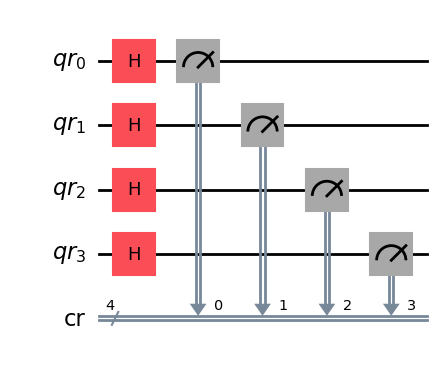

In [4]:
qrng.draw("mpl")

Section - Circuit Execution and Result Analysis

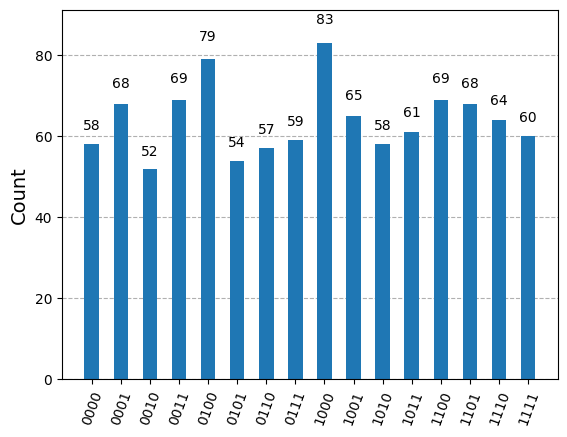

In [5]:
qc_compiled = transpile(qrng, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)

# Plot the result
plot_histogram(counts)